# Encoding and Half Adder

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

{'qiskit-terra': '0.17.0', 'qiskit-aer': '0.8.0', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.12.2', 'qiskit-aqua': '0.9.0', 'qiskit': '0.25.0'}

### Function of a Half Adder

Using just two bits only four possible things a computer need to calculate. 
```
0+0 = 00 (in decimal, this is 0+0=0)
0+1 = 01 (in decimal, this is 0+1=1)
1+0 = 01 (in decimal, this is 1+0=1)
1+1 = 10 (in decimal, this is 1+1=2)
```
This is a *half adder*. 
We shall implement this in the IBMQ - we can chain many of such half-adders together to add anything.

We see in the above truth table that the rightmost bit is determined by whether the two bits we are adding are the same or different. So for ```0+0``` and ```1+1```, where the two bits are equal, the rightmost bit is ```0```. For ```0+1``` and ```1+0```, where we are adding different bit values, the rightmost bit is ```1```.

We know that an <b>XOR Gate</b> can figure out whether two bits are different or not.


### Adding with Qiskit

A half-adder circuit will have a part <b>A</b> that encodes the input, a part <b>B</b> that executes the algorithm, and a part <b>C</b> that extracts the result. 

We need to change the part A whenever we want to use a new input - the rest will remain as it is.

<img src="images/ha.png" alt="" width="500" align="middle"/>

The two bits we want to add are encoded in the qubits 0 and 1. The above example encodes a ```1``` in both these qubits, and so it seeks to find the solution of ```1+1```. The result will be a string of two bits, which we will read out from the qubits 2 and 3. All that remains is to fill in the actual program, which lives in the blank space in the middle.

In a quantum computer, an XOR gate is implemented by a controlled-NOT (CNOT) gate. See [XOR Gate](./004-TwoQubitsGates-XOR.ipynb). If we apply this circuit to a pair of qubits - the target becomes ```0``` if they are the same, and ```1``` if they are different. So, if we execute this circuit, we will get the output as ```11```. But, in our half adder, we do not want to overwrite one of our inputs. Hence we shall write the result on a different pair of qubits. For this we have to use two CNOTs.

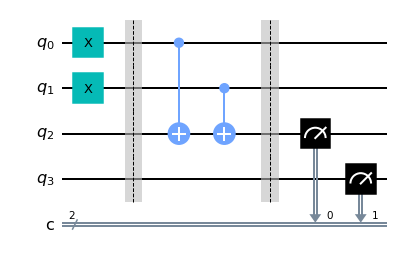

In [3]:
# We start with our half-adder circuit
qc = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc.x(0) # For a=0, remove the this line. For a=1, leave it.
qc.x(1) # For b=0, remove the this line. For b=1, leave it.
qc.barrier()
# use cnots to write the xor of the inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)
qc.barrier()
# extract outputs
qc.measure(2,0) # for xor
qc.measure(3,1) # for AND

qc.draw(output='mpl')

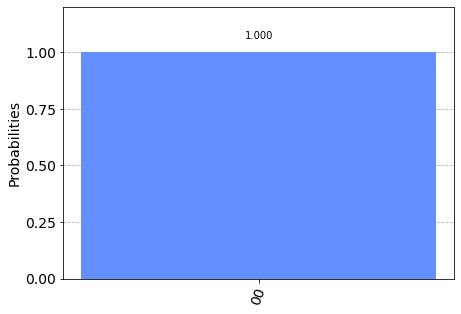

In [5]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

<b>Results : </b>
```
0+0 = 00 
0+1 = 01 
1+0 = 01 
1+1 = 00 
```
This is still not a fully working half adder - only the right bit is done. Now we need to work with the left bit of the output (it will be on qubit 3).

There is only one case for which this bit is ```1``` : ```1+1```=```10```. It happens only when both the bits we are adding are ```1```. So, when both of the inputs are ```1```, we perform a NOT operation on qubit 4 to flip it to ```1```. For this we shall use a [*Toffoli* gate](./005-ThreeQubitsGates.ipynb) (it represents an AND operation).

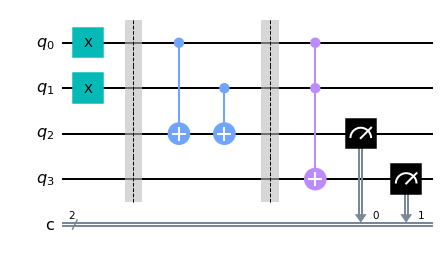

In [6]:
qc = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc.x(0) # For a=0, remove the this line. For a=1, leave it.
qc.x(1) # For b=0, remove the this line. For b=1, leave it.
qc.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc.cx(0,2)
qc.cx(1,2)
qc.barrier()
# use ccx to write the AND of the inputs on qubit 3 - a Toffoli Gate
qc.ccx(0,1,3)
# extract outputs
qc.measure(2,0) # for XOR
qc.measure(3,1) # for AND

qc.draw(output='mpl')

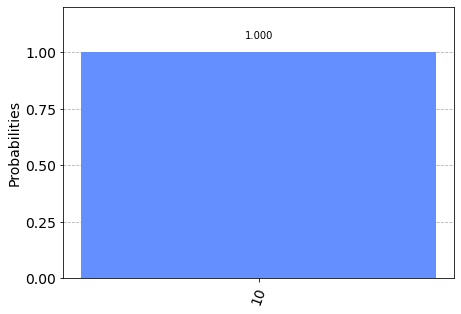

In [8]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

<b>Results : </b>
```
0+0 = 00 
0+1 = 01 
1+0 = 01 
1+1 = 10 
```

This circuit in QC that can solve the mathematical problem of 2 qubits addition.